In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cmath

In [2]:
sales = pd.read_csv("/content/advertising.csv")

In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

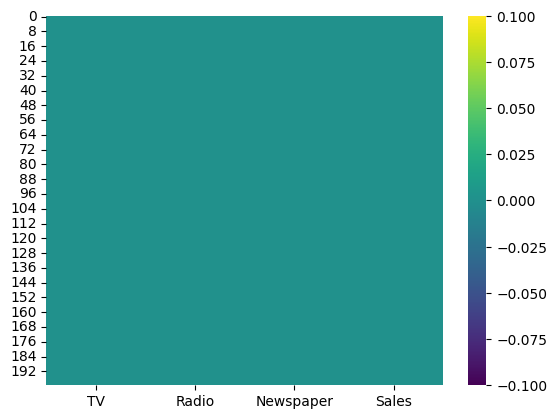

In [6]:
sns.heatmap(sales.isnull(),cmap="viridis")

# **DATA VISUIALIZATION**

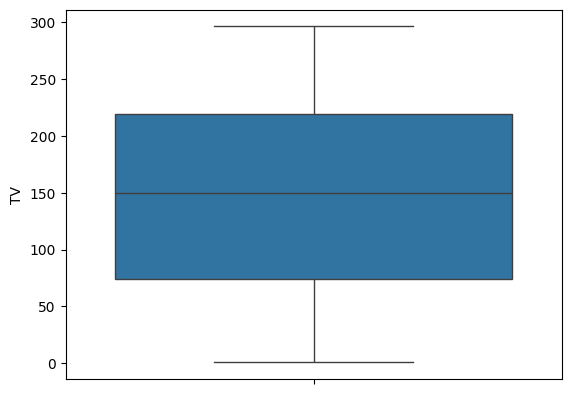

In [7]:
fig = figsize=(10,10)
sns.boxplot(sales["TV"])
plt.show()

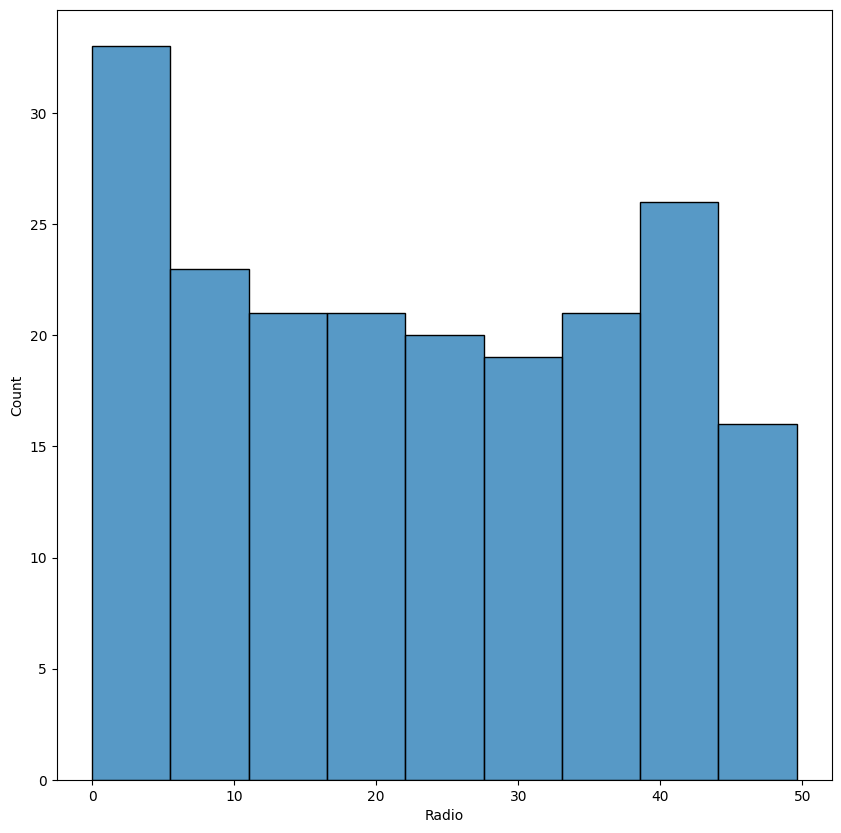

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x=("Radio"),data=sales)
plt.show()

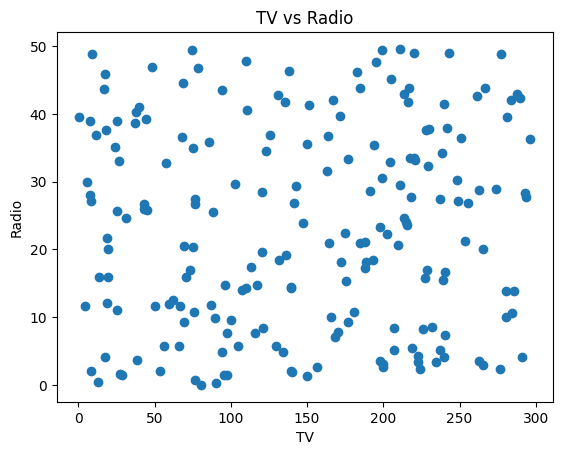

In [ ]:
plt.scatter(x="TV",y="Radio",data=sales)
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("TV vs Radio")
plt.show()

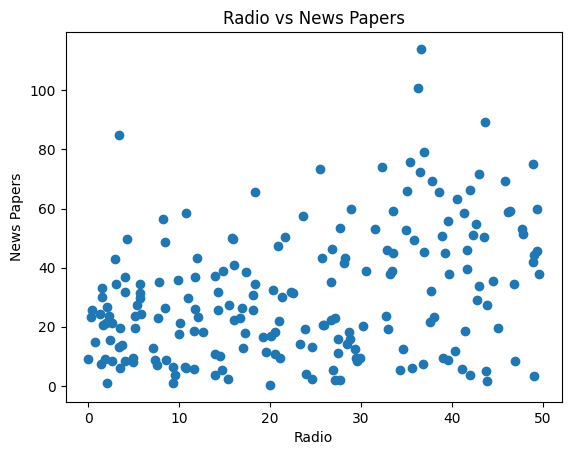

In [ ]:
plt.scatter(x="Radio",y="Newspaper",data=sales,color=)
plt.xlabel("Radio")
plt.ylabel("News Papers")
plt.title("Radio vs News Papers")
plt.show()

In [9]:
X = sales['TV']
Y = sales['Sales']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [19]:
model.fit(X_train.values.reshape(-1,1),Y_train)

LinearRegression()

# **Building a LinearModel**

In [20]:
import statsmodels.api as sm

In [22]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

In [23]:
lr.params

,0
const,7.007108
TV,0.055483


In [24]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.71e-59
Time:                        14:20:08   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

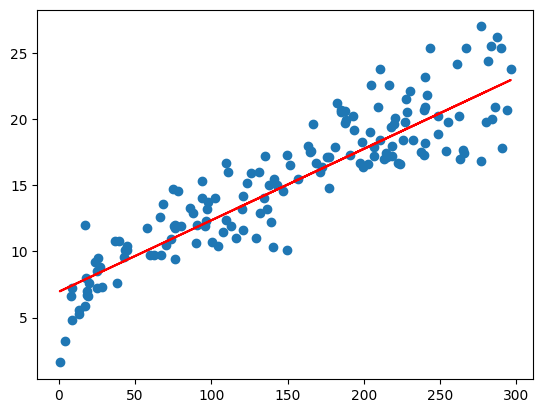

In [26]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [29]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

In [30]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [31]:
y_pred.head()

,0
95,16.067473
15,17.848476
30,23.258063
158,7.656259
128,19.230001


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
np.sqrt(mean_squared_error(Y_test, y_pred))

2.470035001123256

In [36]:
r_squared = r2_score(Y_test, y_pred)
r_squared

0.802561303423698